In [5]:
!mkdir ..\checkpoints
!curl -L -o ..\checkpoints\pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth https://download.openmmlab.com/mmsegmentation/v0.5/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0  187M    0  100k    0     0  77936      0  0:41:57  0:00:01  0:41:56 77975
  0  187M    0 1186k    0     0   509k      0  0:06:15  0:00:02  0:06:13  510k
  1  187M    1 2546k    0     0   765k      0  0:04:10  0:00:03  0:04:07  766k
  2  187M    2 4066k    0     0   939k      0  0:03:23  0:00:04  0:03:19  940k
  2  187M    2 5586k    0     0  1048k      0  0:03:02  0:00:05  0:02:57 1117k
  3  187M    3 7106k    0     0  1123k      0  0:02:50  0:00:06  0:02:44 1400k
  4  187M    4 8498k    0     0  1159k      0  0:02:45  0:00:07  0:02:38 1462k
  5  187M    5  9.9M    0     0  1222k      0  0:02:36  0:00:08  0:02:28 1526k
  6  187M    6 11.6M    0     0  1278k      0  0:02

In [2]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

In [3]:
import torch
import matplotlib.pyplot as plt
from mmengine.model.utils import revert_sync_batchnorm
from mmseg.apis import init_model, inference_model, show_result_pyplot

In [4]:
config_file = '../configs/pspnet/pspnet_r50-d8_4xb2-40k_cityscapes-512x1024.py'
checkpoint_file = '../checkpoints/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth'

In [5]:
model = init_model(config_file, checkpoint_file, device='cuda' if torch.cuda.is_available() else 'cpu')

d:\tomatobotv2\unet\mmsegmentation\mmseg\models\builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
d:\tomatobotv2\unet\mmsegmentation\mmseg\models\losses\cross_entropy_loss.py:249: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


Loads checkpoint by local backend from path: ../checkpoints/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth


In [8]:
img = 'dog.jpg'
if not torch.cuda.is_available():
    model = revert_sync_batchnorm(model)
result = inference_model(model, img)

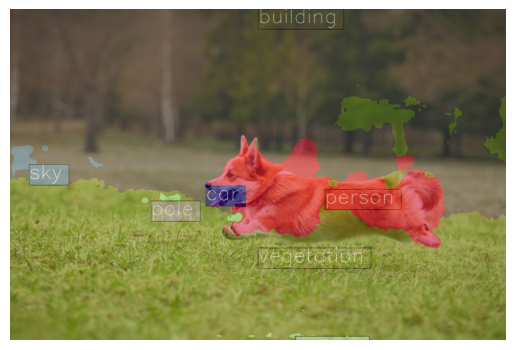

In [9]:
vis_result = show_result_pyplot(model, img, result, show=False)
plt.imshow(vis_result)
plt.axis('off')
plt.show()